In [1]:
import os
from pathlib import Path


os.chdir(Path.cwd().parent)

In [2]:
import matplotlib.pyplot as plt
import numpy as np
import sys

from src.optimizers.step_controllers.step_controllers import (
    ConstantController, BacktrackingLineSearchController
)
from src.optimizers.riemannian_newton_method import RiemannianNewtonIterations
from src.rayleight_quotient import rayleight_quotient
from src.utils.linalg import (
    generate_normalized_vector, generate_supersymmetric_tensor, tenvec
)


In [3]:
%load_ext autoreload
%autoreload 2

In [4]:
def test_riemannian_newton_method_base(
    A: np.ndarray,
    x: np.ndarray,
    *,
    plot: bool = False,
    verbose: bool = False) -> None:
    """
    Ensures gradient descent for f(x) = R_A(X) works properly.

    :param A: supersymmetric tensor of shape (n x n x ... x n) of order k
    :param x: normalized vector of shape (n,)
    :param plot: whether to plot f_history and f_grad_norm_history
    :param verbose: whether to print more info
    """
    if verbose:
        print(f"testing Riemannian Newton method with parameters:\n"
              f"tensor a of shape {A.shape}\na = {A}\n"
              f"vector x = {x}")
    k = A.ndim
    method = RiemannianNewtonIterations.from_tensor(A)
    step_controllers = [BacktrackingLineSearchController()]

    if plot:
        fig, axs = plt.subplots(1, 4, figsize=(15, 7))
        fig.suptitle(f"Newton method iteration statistics for tensor of shape {A.shape}", fontsize=18)

        axs[0].set(title="Rayleigh quotient values log scaled")
        axs[1].set(title="Residual values log scaled")
        axs[2].set(title="Gradient norm values log scaled")
        axs[3].set(title="Linear solver deviation log scaled")

    success_all = True
    for step_controller in step_controllers:
        name = step_controller.name()
        X_eign = method.launch(x, step_controller=step_controller)
        rq_eign = rayleight_quotient(A, X_eign)

        X_expected = rq_eign * X_eign
        X_computed = tenvec(A, X_eign, times=k-1)

        success = np.allclose(X_expected, X_computed, atol=1e-4)
        if success:
            if plot:
                for i, stat in enumerate([method.f_history,
                                          method.f_residual_history,
                                          method.f_grad_norm_history,
                                          method.lin_solver_error_history]):
                    axs[i].semilogy(range(len(stat)), stat, label=name)
                    axs[i].grid(True)
                    axs[i].legend()

                fig.tight_layout()

        else:
            success_all = False
            print(f"Riemannian-Newton method with {name} step controller failed", file=sys.stderr)
    assert success_all


In [5]:
def test_riemannian_newton_method_simple() -> None:
    n = 2
    k = 2
    a = generate_supersymmetric_tensor(n, k)
    x = generate_normalized_vector(n)
    test_riemannian_newton_method_base(a, x, plot=True)

def test_riemannian_newton_method_medium() -> None:
    n = 3
    k = 3
    a = generate_supersymmetric_tensor(n, k)
    x = generate_normalized_vector(n)
    test_riemannian_newton_method_base(a, x, plot=True)

def test_riemannian_newton_method_hard() -> None:
    n = 6
    k = 6
    a = generate_supersymmetric_tensor(n, k)
    x = generate_normalized_vector(n)
    test_riemannian_newton_method_base(a, x, plot=True)

0.7279627238214039
0.14899681421728758
0.0031031737233491053
2.990204806471921e-08


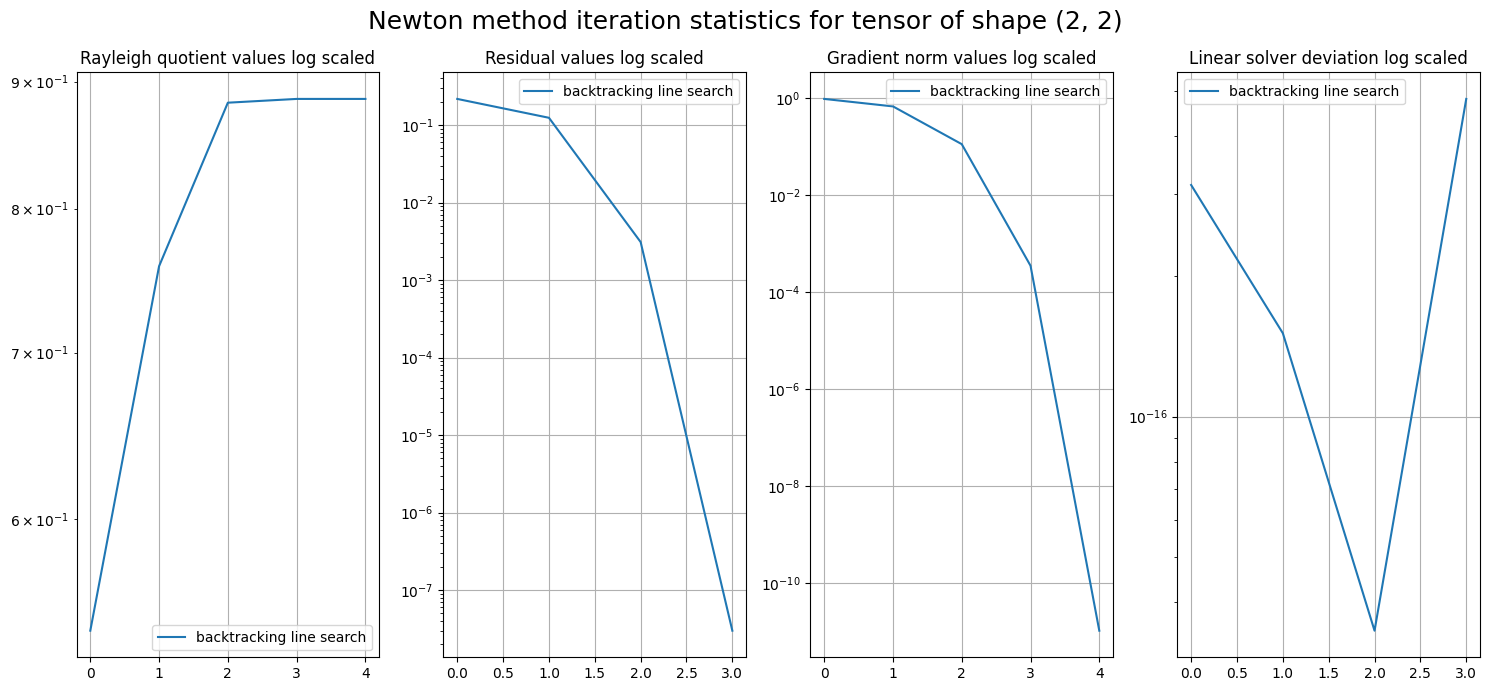

In [6]:
test_riemannian_newton_method_simple()

3.041644861973155
0.12046308690064984
3.583743252904123e-05
3.5837432526956806e-05
3.5837432524877936e-05
3.583743252486271e-05
3.58374325246041e-05
3.583743252408709e-05
3.583743252404611e-05
3.583743252404611e-05
3.583743252404611e-05
3.583743252404611e-05
3.583743252404611e-05
3.583743252404611e-05
3.583743252404611e-05
3.583743252404611e-05
3.583743252404611e-05
3.583743252404611e-05
3.583743252404611e-05
3.583743252404611e-05
3.583743252404611e-05
3.583743252404611e-05
3.583743252404611e-05
3.583743252404611e-05
3.583743252404611e-05
3.583743252404611e-05
3.583743252404611e-05
3.583743252404611e-05
3.583743252404611e-05
3.583743252404611e-05
3.583743252404611e-05
3.583743252404611e-05
3.583743252404611e-05
3.583743252404611e-05
3.583743252404611e-05
3.583743252404611e-05
3.583743252404611e-05
3.583743252404611e-05
3.583743252404611e-05
3.583743252404611e-05
3.583743252404611e-05
3.583743252404611e-05
3.583743252404611e-05
3.583743252404611e-05
3.583743252404611e-05
3.5837432524046

KeyboardInterrupt: 

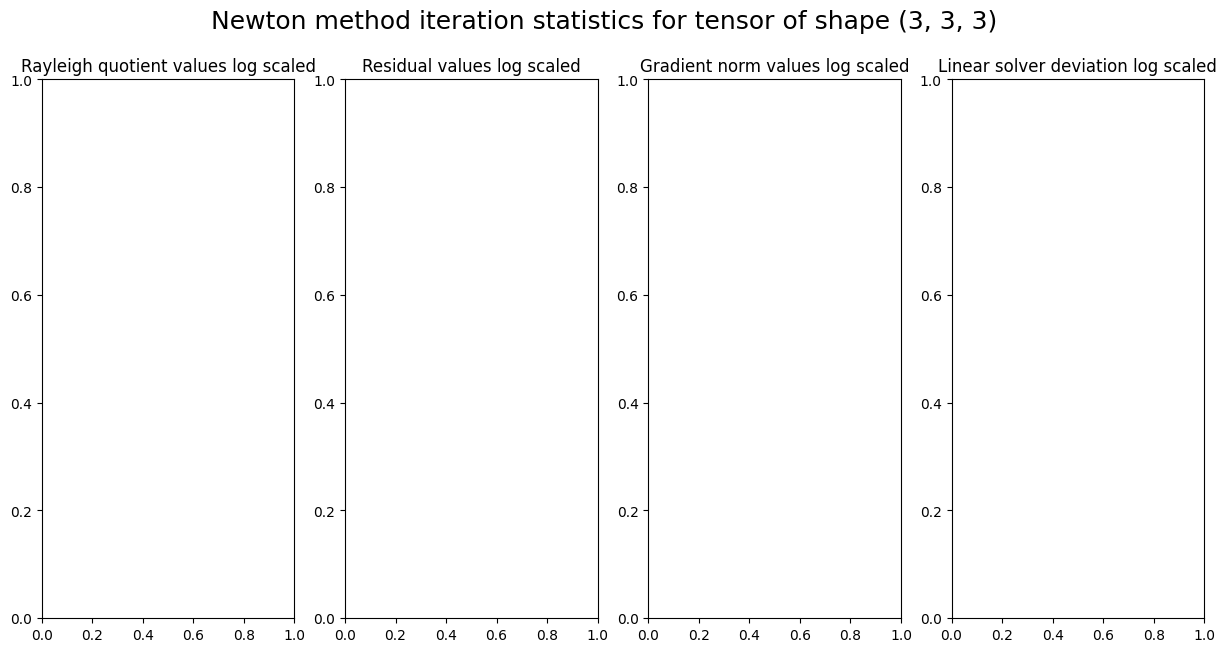

In [7]:
test_riemannian_newton_method_medium()

239531.24367311515
-2429.8356121413112
140.66553800924692
15.038881321501073
236.33976028503344
-105.37085771346472
3.599680429277564
-1.9946851126944583
-1.6068437535106714
2.4159061896183642


KeyboardInterrupt: 

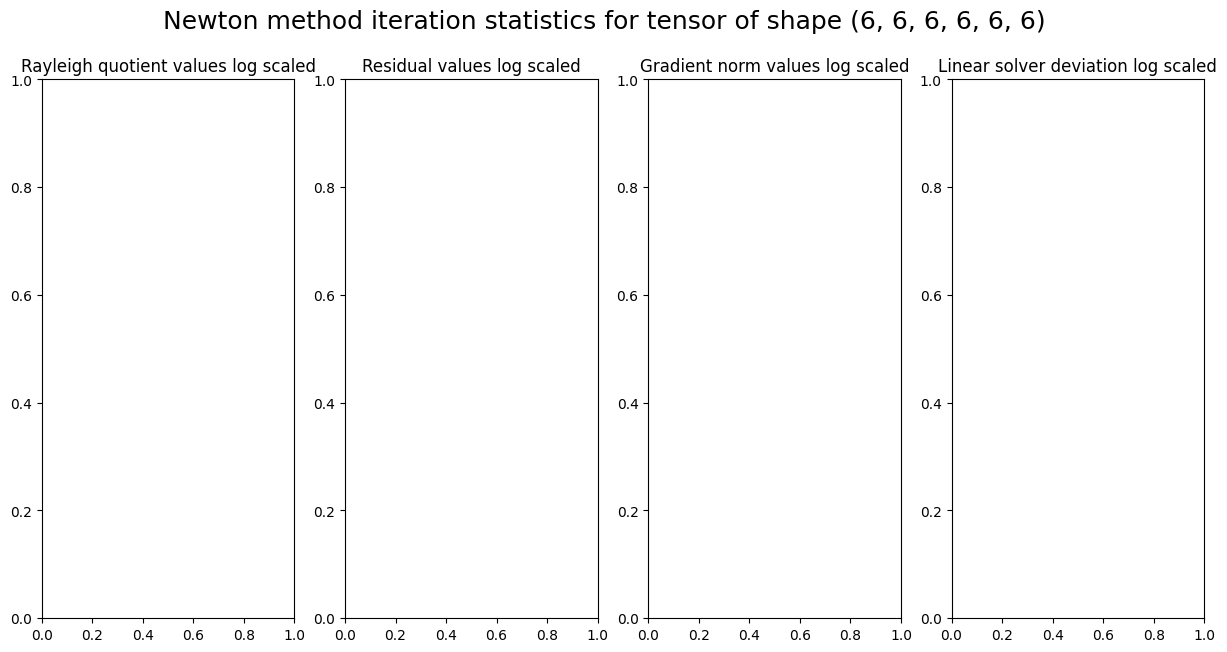

In [ ]:
test_riemannian_newton_method_hard()